<a href="https://colab.research.google.com/github/AcidTr/raster-dda/blob/main/Raster_cg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [356]:
import matplotlib.pyplot as plt
import numpy as np

In [357]:
#função que retorna os fragmentos de todos os pontos
def createFragments(x_array,y_array):
  average_X = np.floor(np.array(x_array)) + 0.5
  average_Y = np.floor(np.array(y_array)) + 0.5
  return average_X, average_Y

In [358]:
#Função que retorna o array de zeros e uns para plotar

#Recebe os pontos inicias e finais do segmento de reta e um multiplicador 
#para aumentar a quantidade de pixels gerados
def createZerosArray(x1, x2, y1, y2, multiplicador = 1):
  #entrada com os valores dos pontos
  x1 *= multiplicador
  x2 *= multiplicador
  y1 *= multiplicador
  y2 *= multiplicador

  delta_y = y2 - y1
  delta_x = x2 - x1

  m = delta_y/delta_x

  limit = (x2-x1) if (x2-x1) > (y2-y1) else (y2-y1)

  delta_x = delta_x/limit
  delta_y = delta_y/limit



  #calculando o termo independente
  b = y1 - m*x1

  if ((x2 - x1) > (y2 -y1)):
    #criando dois arrays com os valores de x e y
    x_array = np.arange(x1, x2 )
    y_array = []

    for element in x_array:
      y_array.append(m*element + b)


    x,y = createFragments(x_array, y_array)

    

    arr = np.zeros((10 * multiplicador,10 * multiplicador))
    x = np.floor(x).astype(int)
    y = np.floor(y).astype(int)
    verts = np.array((x,y)).T

    arr[x,y] = 1

    return arr.T
  else:
    #Caso especial onde o a variação de y é maior que a de x

    #criando dois arrays com os valores de x e y
    x_array = []
    y_array = np.arange(y1, y2 , delta_y);

    for i in range(limit):
      if (i == 0):
        x_array.append(delta_x)
      else:
        x_array.append(x_array[i-1] + delta_x)

    x,y = createFragments(x_array, y_array)


    arr = np.zeros((10 * multiplicador,10 * multiplicador))
    x = np.floor(x).astype(int)
    y = np.floor(y).astype(int)
    verts = np.array((x,y)).T

    arr[x,y] = 1

    return arr.T

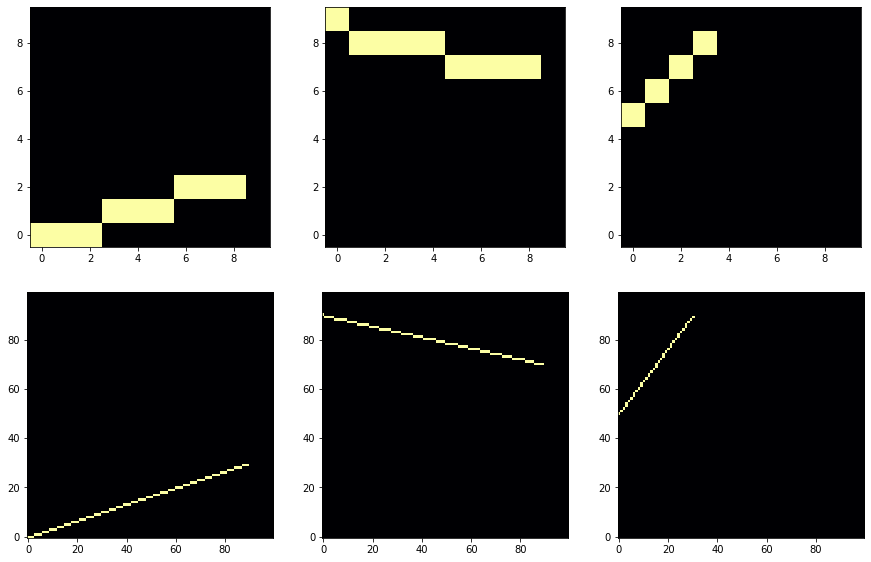

In [360]:

arr = createZerosArray(0,9,0,3);
arr2 = createZerosArray(0,9,9,7);
arr3 = createZerosArray(0,3,5,9);
arr4 = createZerosArray(0,9,0,3,10);
arr5 = createZerosArray(0,9,9,7,10);
arr6 = createZerosArray(0,3,5,9,10);


fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(3, 3, 1)
ax.imshow(arr, interpolation='nearest', aspect='equal', origin='lower', cmap='inferno')
# plt.plot([0, 9], [0, 3])


ax2 = fig.add_subplot(3, 3, 2)
ax2.imshow(arr2, interpolation='nearest', aspect='equal', origin='lower', cmap='inferno')
# plt.plot([0, 9], [9, 7])

ax3 = fig.add_subplot(3, 3, 3)
ax3.imshow(arr3, interpolation='nearest', aspect='equal', origin='lower', cmap='inferno')
# plt.plot([0, 3], [5, 9])

ax4 = fig.add_subplot(1, 3, 1)
ax4.imshow(arr4, interpolation='nearest', aspect='equal', origin='lower', cmap='inferno')
# plt.plot([0, 900], [0, 300])

ax5 = fig.add_subplot(1, 3, 2)
ax5.imshow(arr5, interpolation='nearest', aspect='equal', origin='lower', cmap='inferno')
# plt.plot([0, 900], [900, 700])

ax6 = fig.add_subplot(1, 3, 3)
ax6.imshow(arr6, interpolation='nearest', aspect='equal', origin='lower', cmap='inferno')
# plt.plot([0, 300], [500, 900])


plt.show();